In [1]:
!pip install torch torchvision scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np


In [3]:
import torch

In [4]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from transformers import pipeline
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('salaries.csv')



In [5]:
# Data Preprocessing: Handling missing values
df = df[['max_salary', 'min_salary']].dropna()
X = df[['min_salary']].values  # Using min_salary as input
y = df[['max_salary']].values  # Predicting max_salary

In [6]:
# Normalize the data
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())


In [7]:
# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [8]:
# Define RNN, LSTM, and GRU models
class SalaryPredictor(nn.Module):
    def __init__(self, model_type='RNN'):
        super(SalaryPredictor, self).__init__()
        self.hidden_size = 50
        self.model_type = model_type
        self.input_size = 1

        if model_type == 'RNN':
            self.rnn = nn.RNN(self.input_size, self.hidden_size, batch_first=True)
        elif model_type == 'LSTM':
            self.rnn = nn.LSTM(self.input_size, self.hidden_size, batch_first=True)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(self.input_size, self.hidden_size, batch_first=True)

        self.fc = nn.Linear(self.hidden_size, 1)
    def forward(self, x):
        x = x.unsqueeze(2)  # Add sequence dimension
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [9]:
# Training function
def train_model(model, dataloader, epochs=20):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    losses = []

    for epoch in range(epochs):
        for batch in dataloader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    return losses

Training RNN...
Epoch 1/20, Loss: 0.0000
Epoch 2/20, Loss: 0.0000
Epoch 3/20, Loss: 0.0006
Epoch 4/20, Loss: 0.0000
Epoch 5/20, Loss: 0.0000
Epoch 6/20, Loss: 0.0000
Epoch 7/20, Loss: 0.0000
Epoch 8/20, Loss: 0.0000
Epoch 9/20, Loss: 0.0000
Epoch 10/20, Loss: 0.0000
Epoch 11/20, Loss: 0.0000
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0000
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.0000
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
Training LSTM...
Epoch 1/20, Loss: 0.0000
Epoch 2/20, Loss: 0.0000
Epoch 3/20, Loss: 0.0000
Epoch 4/20, Loss: 0.0000
Epoch 5/20, Loss: 0.0000
Epoch 6/20, Loss: 0.0000
Epoch 7/20, Loss: 0.0000
Epoch 8/20, Loss: 0.0000
Epoch 9/20, Loss: 0.0000
Epoch 10/20, Loss: 0.0000
Epoch 11/20, Loss: 0.0000
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0000
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.00

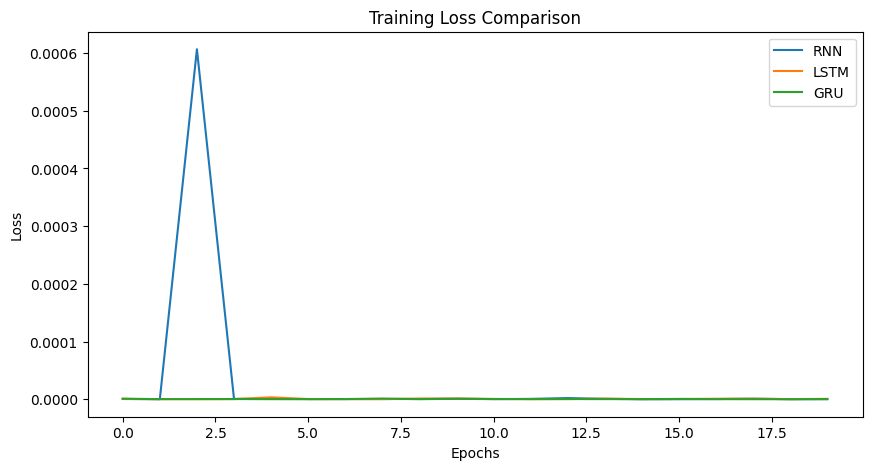

In [10]:
# Train and compare models
models = {'RNN': SalaryPredictor('RNN'), 'LSTM': SalaryPredictor('LSTM'), 'GRU': SalaryPredictor('GRU')}
losses = {}

for name, model in models.items():
    print(f"Training {name}...")
    losses[name] = train_model(model, dataloader)

# Plot loss curves
plt.figure(figsize=(10,5))
for name, loss in losses.items():
    plt.plot(loss, label=name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Comparison')
plt.show()

In [11]:
from transformers import pipeline
explainer = pipeline("text-generation", model="gpt2",truncation=True)  # Using a lighter model
prompt = "Explain the differences between RNN, LSTM, and GRU performance using this approach"
explanation = explainer(prompt, max_length=350,num_return_sequences=1)  # Reduced max_length to save memory
print("\nExplainability Output:", explanation[0]["generated_text"])

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Explainability Output: Explain the differences between RNN, LSTM, and GRU performance using this approach. The following image shows a visual display of the difference in performance of different memory subsystems for different classes of functions. The main differences are apparent when we break down the performance performance into classes and memory subsystems.

Note The RNN (rNN) and LSTM (lSTM) routines perform the same (single operand, multiplicative) instructions. Both R and LSTM can perform multiple, multiplicative instructions.

What's the Difference Between LSTM and LSTM?

LSTM and LRU perform the same instructions in the same order as R (lSTM) and LSTM and LRU(rNN) (rLSTM). This can result in different performance results, especially if the L-R combination is an important memory or if it is used to perform multiple operations. These memory instructions can be classified as follows:


Table 1 - LSTM and LRU Description of LSTM LSTM LRU LSTM LSTM - L Strict RNN LSTM LSTM LSTM